In [134]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# load the excel file
patient_data = pd.read_csv('../data/KaggleV2-May-2016.csv')
patient_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [107]:
# Separate the categorical variables
cont_feat = ['ScheduledDay', 'AppointmentDay', 'Age']
patient_data.drop(cont_feat, axis=1, inplace=True)

In [108]:
patient_data.head()

,PatientId,AppointmentID,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
# Check if there are null values
patient_data.isnull().sum()

PatientId        0
AppointmentID    0
Gender           0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [110]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
PatientId        110527 non-null float64
AppointmentID    110527 non-null int64
Gender           110527 non-null object
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 9.3+ MB


In [111]:
# Check the count of unique values for each of the feature
for col in patient_data.columns:
    print(f'{col} = {patient_data[col].nunique()}')

PatientId = 62299
AppointmentID = 110527
Gender = 2
Neighbourhood = 81
Scholarship = 2
Hipertension = 2
Diabetes = 2
Alcoholism = 2
Handcap = 5
SMS_received = 2
No-show = 2


In [112]:
# Convert the No-show column from string to numeric (int)
patient_data['No-show'] = patient_data['No-show'].map({'No': 0, 'Yes': 1})

In [113]:
# Convert Gender to numeric
patient_data['Gender'] = patient_data['Gender'].map({'M': 0, 'F': 1})

In [114]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
PatientId        110527 non-null float64
AppointmentID    110527 non-null int64
Gender           110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 9.3+ MB


In [115]:
for col in patient_data.columns:
    print(f'{col} : {patient_data[col].nunique()}')

PatientId : 62299
AppointmentID : 110527
Gender : 2
Neighbourhood : 81
Scholarship : 2
Hipertension : 2
Diabetes : 2
Alcoholism : 2
Handcap : 5
SMS_received : 2
No-show : 2


In [116]:
cat_feat_subset = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for feat in cat_feat_subset:
    df = patient_data.groupby(feat).mean()
    print(df['No-show'])

Gender
0    0.199679
1    0.203146
Name: No-show, dtype: float64
Scholarship
0    0.198072
1    0.237363
Name: No-show, dtype: float64
Hipertension
0    0.209037
1    0.173020
Name: No-show, dtype: float64
Diabetes
0    0.203628
1    0.180033
Name: No-show, dtype: float64
Alcoholism
0    0.201946
1    0.201488
Name: No-show, dtype: float64
Handcap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: No-show, dtype: float64
SMS_received
0    0.167033
1    0.275745
Name: No-show, dtype: float64


Don't really see any of the features really standing out

In [117]:
# Check if same patient has missed previous appointment
patient_data['MissedApp'] = patient_data.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())

In [118]:
patient_data[patient_data['MissedApp']>10].groupby('MissedApp')['No-show'].mean()

MissedApp
11    0.714286
12    0.428571
13    1.000000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
Name: No-show, dtype: float64

There is a high chance that if a person has high appointments missed, they will miss the next one

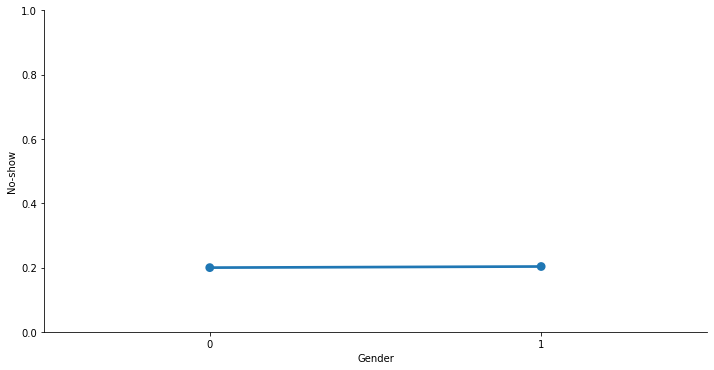

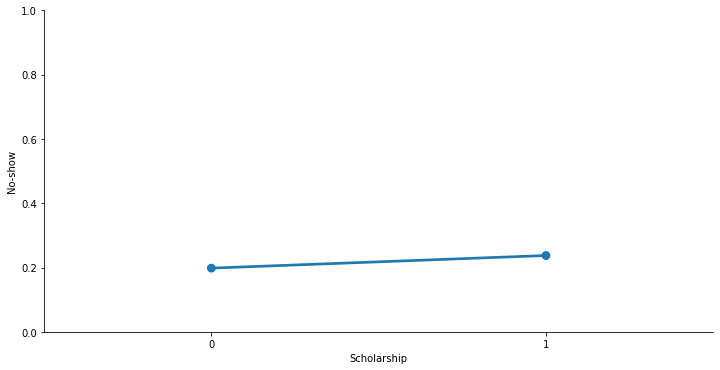

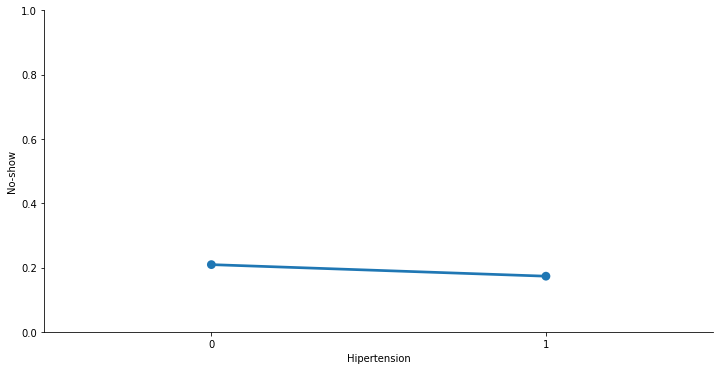

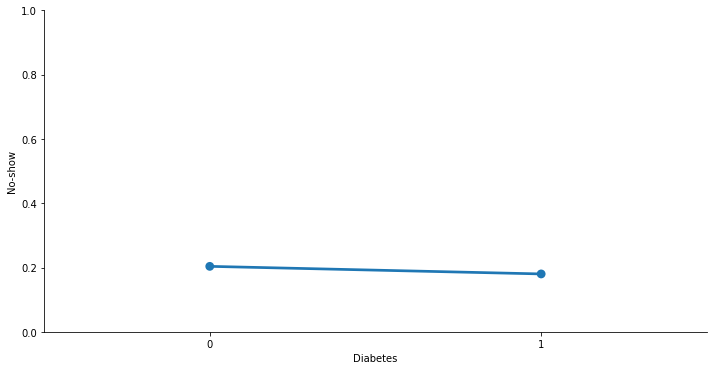

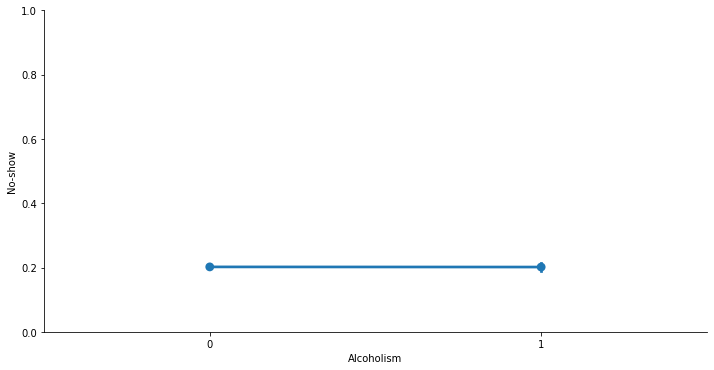

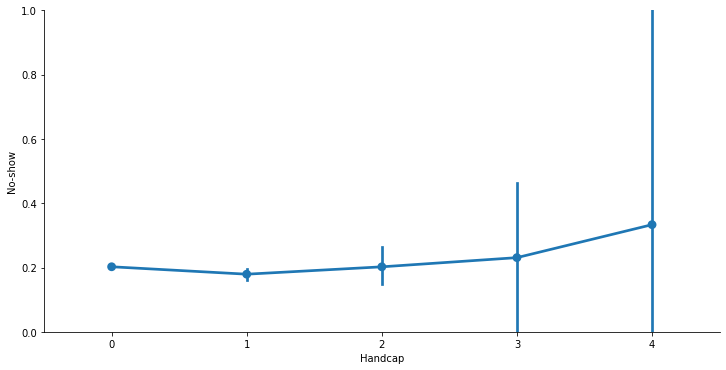

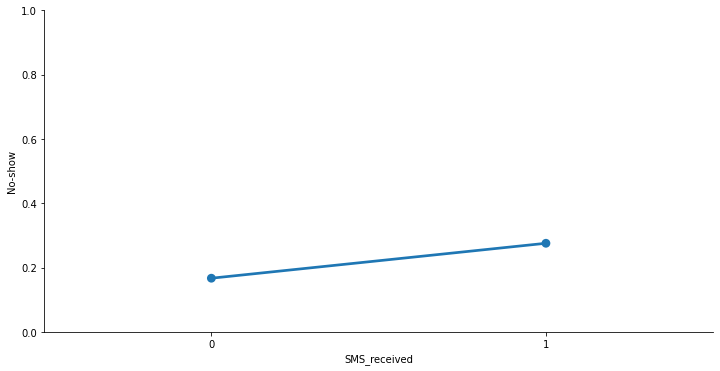

In [135]:
for feat in ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']:
    sns.catplot(x=feat, y='No-show', data=patient_data, kind='point', aspect=2)
    plt.ylim(0,1)